Libraries

In [1]:
import numpy as np
import random
import math, random
import matplotlib.pyplot as plt

tai17a

In [2]:
import numpy as np

# Distance matrix (17x17)
distance_matrix_17 = np.array([
    [ 0, 20, 86,  4, 77, 15, 89, 48, 14, 89, 44, 59, 22, 57, 63,  6,  0],
    [20,  0, 62, 41, 62, 46, 25, 75, 76, 40, 66, 58, 30, 68, 78, 91, 13],
    [86, 62,  0, 59, 49, 85, 84,  8, 38, 41, 56, 39, 53, 77, 50, 30, 58],
    [ 4, 41, 59,  0, 55, 19, 85, 52, 34, 53, 40, 69, 12, 85, 72,  7, 49],
    [77, 62, 49, 55,  0, 46, 87, 58, 17, 68, 27, 21,  6, 67, 26, 82, 44],
    [15, 46, 85, 19, 46,  0, 35,  3, 62,  8, 51,  1, 91, 39, 87, 72, 45],
    [89, 25, 84, 85, 87, 35,  0, 96,  7, 87, 68, 33,  3, 21, 90, 45, 47],
    [48, 75,  8, 52, 58,  3, 96,  0, 25, 30, 43, 97, 33, 35, 61, 42, 36],
    [14, 76, 38, 34, 17, 62,  7, 25,  0, 43,  7, 84,  6,  0,  0, 48, 62],
    [89, 40, 41, 53, 68,  8, 87, 30, 43,  0, 59, 29, 94, 82, 29,  3,  3],
    [44, 66, 56, 40, 27, 51, 68, 43,  7, 59,  0, 51, 67, 39, 15, 66, 42],
    [59, 58, 39, 69, 21,  1, 33, 97, 84, 29, 51,  0, 23, 62, 62, 28, 76],
    [22, 30, 53, 12,  6, 91,  3, 33,  6, 94, 67, 23,  0, 66, 82, 98, 35],
    [57, 68, 77, 85, 67, 39, 21, 35,  0, 82, 39, 62, 66,  0, 15, 17, 77],
    [63, 78, 50, 72, 26, 87, 90, 61,  0, 29, 15, 62, 82, 15,  0, 44, 26],
    [ 6, 91, 30,  7, 82, 72, 45, 42, 48,  3, 66, 28, 98, 17, 44,  0, 76],
    [ 0, 13, 58, 49, 44, 45, 47, 36, 62,  3, 42, 76, 35, 77, 26, 76,  0]
])

# Flow matrix (17x17)
flow_matrix_17 = np.array([
    [ 0, 21, 95, 82, 56, 41,  6, 25, 10,  4, 63,  6, 44, 40, 75, 79,  0],
    [21,  0, 89, 35,  9,  1, 85, 84, 12,  0, 26, 91, 11, 35, 82, 26, 69],
    [95, 89,  0, 56, 86, 45, 91, 59, 18, 76, 39, 18, 57, 36, 61, 36, 21],
    [82, 35, 56,  0, 71, 11, 29, 82, 82,  6, 71,  8, 77, 74, 30, 89, 76],
    [56,  9, 86, 71,  0, 76, 40, 93, 56,  1, 50,  4, 36, 27, 85,  2,  1],
    [41,  1, 45, 11, 76,  0, 15, 11, 35, 11, 20, 21, 61, 80, 58, 21, 76],
    [ 6, 85, 91, 29, 40, 15,  0, 72, 44, 85, 94, 90, 51,  3, 48, 29, 90],
    [25, 84, 59, 82, 93, 11, 72,  0, 66, 41, 15, 83, 96, 74, 45, 65, 40],
    [10, 12, 18, 82, 56, 35, 44, 66,  0, 54, 83, 14, 71, 77, 36, 53, 37],
    [ 4,  0, 76,  6,  1, 11, 85, 41, 54,  0, 26, 87, 76, 91, 13, 29, 11],
    [63, 26, 39, 71, 50, 20, 94, 15, 83, 26,  0, 77, 32, 87, 67, 94, 79],
    [ 6, 91, 18,  8,  4, 21, 90, 83, 14, 87, 77,  0,  2, 10, 99, 56, 70],
    [44, 11, 57, 77, 36, 61, 51, 96, 71, 76, 32,  2,  0, 99, 60,  4, 56],
    [40, 35, 36, 74, 27, 80,  3, 74, 77, 91, 87, 10, 99,  0,  2, 60, 72],
    [75, 82, 61, 30, 85, 58, 48, 45, 36, 13, 67, 99, 60,  2,  0, 74, 46],
    [79, 26, 36, 89,  2, 21, 29, 65, 53, 29, 94, 56,  4, 60, 74,  0, 13],
    [ 0, 69, 21, 76,  1, 76, 90, 40, 37, 11, 79, 70, 56, 72, 46, 13,  0]
])

Cost Function

In [3]:
# --- Cost Function ---
def calculate_cost(solution, flow, dist):
    return sum(flow[i][j] * dist[solution[i]][solution[j]] for i in range(len(solution)) for j in range(len(solution)))

Neighbouring Functions

In [4]:
# --- Neighbor Functions ---
def neighbor_swap(s):
    s = s.copy()
    i, j = random.sample(range(len(s)), 2)
    s[i], s[j] = s[j], s[i]
    return s

def neighbor_insert(s):
    s = s.copy()
    i, j = random.sample(range(len(s)), 2)
    elem = s.pop(i)
    s.insert(j, elem)
    return s

def neighbor_reverse(s):
    s = s.copy()
    i, j = sorted(random.sample(range(len(s)), 2))
    s[i:j+1] = reversed(s[i:j+1])
    return s

def neighbor_three_swap(s):
    s = s.copy()
    i, j, k = sorted(random.sample(range(len(s)), 3))
    s[i], s[j], s[k] = s[k], s[i], s[j]
    return s


Roulette Wheel Selection Logic

In [5]:
neighbor_functions = [neighbor_swap, neighbor_insert, neighbor_reverse, neighbor_three_swap]
scores = [1.0 for _ in neighbor_functions]

# --- Roulette Wheel Selection ---
def roulette_wheel_select(weights):
    total = sum(weights)
    pick = random.uniform(0, total)
    current = 0
    for i, weight in enumerate(weights):
        current += weight
        if current > pick:
            return i
    return len(weights) - 1

Enhanced SA

In [6]:
def enhanced_simulated_annealing(flow, dist, T0=100000, alpha=0.97, beta=1, Mk=20, max_temp_loops=1000, cooling='default'):
    n = len(flow)
    current_solution = list(range(n))
    random.shuffle(current_solution)
    current_cost = calculate_cost(current_solution, flow, dist)
    best_solution = current_solution[:]
    best_cost = current_cost
    T = T0
    k = 1  # start from 1 to avoid log(0)

    convergence = []  # To store best cost at each temperature step

    while k <= max_temp_loops:
        m = 0
        while m < Mk:
            idx = roulette_wheel_select(scores)
            neighbor = neighbor_functions[idx]
            candidate = neighbor(current_solution)
            candidate_cost = calculate_cost(candidate, flow, dist)

            delta = candidate_cost - current_cost
            if delta <= 0 or random.random() < math.exp(-delta / T):
                current_solution = candidate
                current_cost = candidate_cost
                scores[idx] += 1
                if current_cost < best_cost:
                    best_solution = current_solution[:]
                    best_cost = current_cost
            else:
                scores[idx] *= 0.99
            m += 1

        convergence.append(best_cost)  # Track the best cost at this temperature

        # --- Cooling ---
        if cooling == 'default':
            T *= alpha
        elif cooling == 'linear':
            T -= beta
            T = max(T, 1e-8)
        elif cooling == 'logarithmic':
            T = T0 / math.log(k + 1)
        else:
            raise ValueError(f"Unknown cooling method: {cooling}")

        k += 1

    return best_solution, best_cost, convergence


Simple SA

In [7]:
def simulated_annealing_single_neighbor(flow, dist, T0=100000, alpha=0.97, beta=1,
                                        Mk=20, max_temp_loops=1000, cooling='default'):
    n = len(flow)
    current_solution = list(range(n))
    random.shuffle(current_solution)
    current_cost = calculate_cost(current_solution, flow, dist)

    best_solution = current_solution[:]
    best_cost = current_cost
    T = T0
    k = 1

    convergence = []

    while k <= max_temp_loops:
        for _ in range(Mk):
            candidate = neighbor_insert(current_solution)
            candidate_cost = calculate_cost(candidate, flow, dist)
            delta = candidate_cost - current_cost

            if delta <= 0 or random.random() < math.exp(-delta / T):
                current_solution = candidate
                current_cost = candidate_cost
                if current_cost < best_cost:
                    best_solution = current_solution[:]
                    best_cost = current_cost

        convergence.append(best_cost)

        # Cooling
        if cooling == 'default':
            T *= alpha
        elif cooling == 'linear':
            T -= beta
            T = max(T, 1e-8)
        elif cooling == 'logarithmic':
            T = T0 / math.log(k + 1)
        else:
            raise ValueError(f"Unknown cooling method: {cooling}")

        k += 1

    return best_solution, best_cost, convergence

Main

Enhanced SA - Run 1: Best Cost = 520,794
Single Neighbor SA - Run 1: Best Cost = 523,114
Enhanced SA - Run 2: Best Cost = 526,158
Single Neighbor SA - Run 2: Best Cost = 549,426
Enhanced SA - Run 3: Best Cost = 504,262
Single Neighbor SA - Run 3: Best Cost = 542,764
Enhanced SA - Run 4: Best Cost = 509,956
Single Neighbor SA - Run 4: Best Cost = 551,262
Enhanced SA - Run 5: Best Cost = 503,882
Single Neighbor SA - Run 5: Best Cost = 531,424
Enhanced SA - Run 6: Best Cost = 520,674
Single Neighbor SA - Run 6: Best Cost = 536,980
Enhanced SA - Run 7: Best Cost = 505,458
Single Neighbor SA - Run 7: Best Cost = 541,858
Enhanced SA - Run 8: Best Cost = 520,970
Single Neighbor SA - Run 8: Best Cost = 535,130
Enhanced SA - Run 9: Best Cost = 518,868
Single Neighbor SA - Run 9: Best Cost = 552,706
Enhanced SA - Run 10: Best Cost = 505,990
Single Neighbor SA - Run 10: Best Cost = 557,320

=== Summary Table: Enhanced SA ===
Algorithm	R. 1	R. 2	R. 3	R. 4	R. 5	R. 6	R. 7	R. 8	R. 9	R. 10	Average
Enh

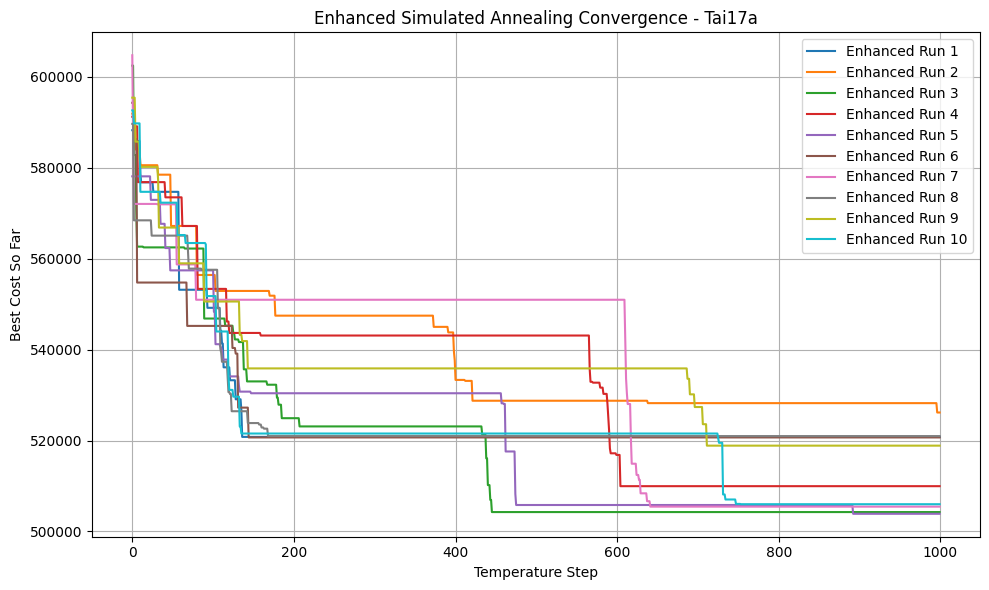

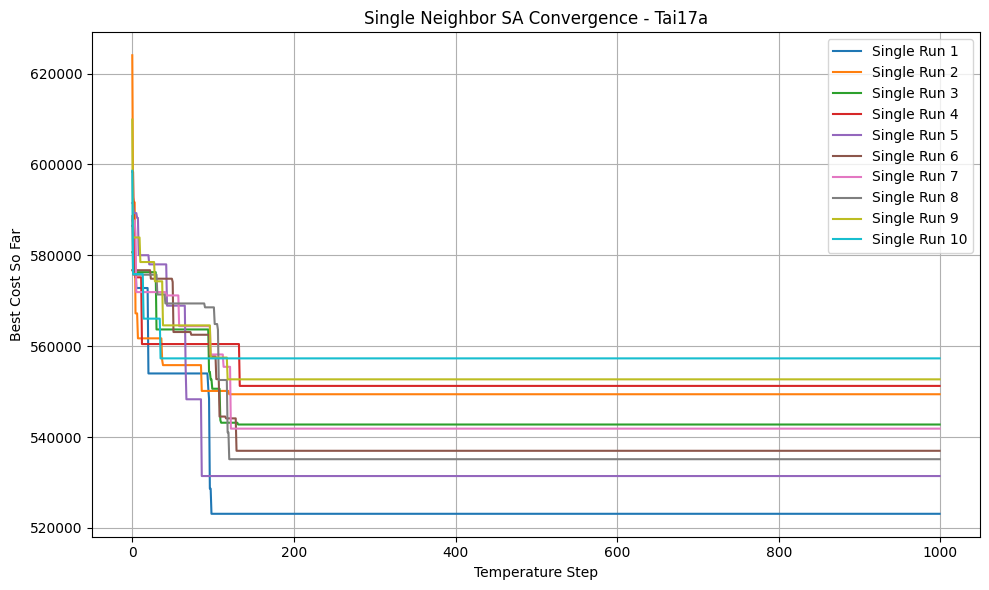

In [8]:
# --- Run the Algorithm 10 Times ---
problem_name = "Tai17a"
problem_size = distance_matrix_17.shape[0]

# Store results separately for both SA variants
results_single = []
results_enhanced = []
convergence_single = []
convergence_enhanced = []

# --- SA Parameters ---
T0 = 100000
alpha = 0.97
beta = 100  # Only used for linear cooling
Mk = 20
max_temp_loops = 1000
cooling_method = 'default'  # Options: 'default', 'linear', 'logarithmic'

# --- Run 10 times for both SA variants ---
for run in range(10):
    # Enhanced SA with multiple neighbors
    sol_e, cost_e, conv_e = enhanced_simulated_annealing(
        flow_matrix_17,
        distance_matrix_17,
        T0=T0,
        alpha=alpha,
        beta=beta,
        Mk=Mk,
        max_temp_loops=max_temp_loops,
        cooling=cooling_method
    )
    results_enhanced.append(cost_e)
    convergence_enhanced.append(conv_e)
    print(f"Enhanced SA - Run {run+1}: Best Cost = {cost_e:,}")

    # Standard SA with single neighbor
    sol_s, cost_s, conv_s = simulated_annealing_single_neighbor(
        flow_matrix_17,
        distance_matrix_17,
        T0=T0,
        alpha=alpha,
        beta=beta,
        Mk=Mk,
        max_temp_loops=max_temp_loops,
        cooling=cooling_method
    )
    results_single.append(cost_s)
    convergence_single.append(conv_s)
    print(f"Single Neighbor SA - Run {run+1}: Best Cost = {cost_s:,}")

# --- Summary Table Function ---
def print_summary_table(name, results):
    average = sum(results) / len(results)
    print(f"\n=== Summary Table: {name} ===")
    print("Algorithm\t" + "\t".join([f"R. {i+1}" for i in range(10)]) + "\tAverage")
    print(f"{name}\t" + "\t".join(f"{r:,}" for r in results) + f"\t{average:,.2f}")

print_summary_table("Enhanced SA", results_enhanced)
print_summary_table("Single Neighbor SA", results_single)

# --- Plot Convergence for Each SA Variant ---
plt.figure(figsize=(10, 6))
for i, conv in enumerate(convergence_enhanced):
    plt.plot(conv, label=f"Enhanced Run {i+1}")
plt.title(f"Enhanced Simulated Annealing Convergence - {problem_name}")
plt.xlabel("Temperature Step")
plt.ylabel("Best Cost So Far")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for i, conv in enumerate(convergence_single):
    plt.plot(conv, label=f"Single Run {i+1}")
plt.title(f"Single Neighbor SA Convergence - {problem_name}")
plt.xlabel("Temperature Step")
plt.ylabel("Best Cost So Far")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()